In [1]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt

## 1

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

iris = load_iris().data[:, 2:4]
iris_target = load_iris().target

MinMax = MinMaxScaler()
MinMax.fit(iris)
iris_transf = MinMax.transform(iris)

x_train, x_test, y_train, y_test = train_test_split(iris_transf, iris_target, random_state=42)

In [3]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", C=1000)
svc.fit(x_train, y_train)
train_score = svc.score(x_train, y_train)
test_score = svc.score(x_test, y_test)

print("train score : ", train_score, "test_score : ", test_score)

train score :  0.9821428571428571 test_score :  0.9736842105263158


[]

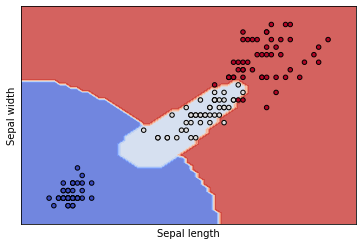

In [4]:
ax = plt.subplot()

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X0, X1 = iris_transf[:, 0], iris_transf[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=iris_target, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())

## 2

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42)

In [6]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
train_score = svc.score(x_train, y_train)
test_score = svc.score(x_test, y_test)

print("train score : ", train_score, "test_score : ", test_score)

train score :  0.9962880475129918 test_score :  0.9866666666666667


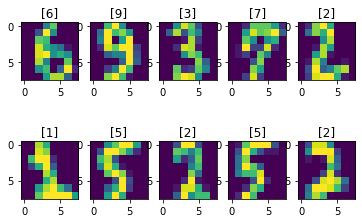

In [7]:
fig, sub = plt.subplots(2,5)
for i, ax in zip(range(10), sub.flatten()):
    num = svc.predict(x_test[i].reshape(1, -1))
    ax.imshow(x_test[i].reshape(8,8))
    ax.set_title(str(num))

## 3

In [8]:
import adaboost

In [9]:
x_train, y_train = adaboost.loadDataSet('horseColicTraining2.txt')
x_test, y_test = adaboost.loadDataSet('horseColicTest2.txt')

In [10]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
train_score = svc.score(x_train, y_train)
test_score = svc.score(x_test, y_test)

print("train score : ", train_score, "test_score : ", test_score)

train score :  0.7424749163879598 test_score :  0.7761194029850746


### 网格搜索

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma':[1e-3, 1e-4]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

print("Best parameters: ", clf.best_params_)

train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

print("train score : ", train_score, "test_score : ", test_score)

Best parameters:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
train score :  0.7759197324414716 test_score :  0.7761194029850746


### 随机搜索

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
svc = SVC()
rand_list = {"C": uniform(2, 10),
             "gamma": uniform(0.1, 1)}
clf = RandomizedSearchCV(svc, rand_list, random_state=42)
clf.fit(x_train, y_train)

print("Best parameters: ", clf.best_params_)

train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

print("train score : ", train_score, "test_score : ", test_score)

Best parameters:  {'C': 9.31993941811405, 'gamma': 0.6986584841970366}
train score :  0.9966555183946488 test_score :  0.7313432835820896
